# Explorando as Taxas de Consumo de Álcool por Estudantes

#### Projeto da Disciplina "Análise de Dados" - Pós-graduação em Visão Computacional - CIn-UFPE.

Aluno: Daniel Macedo

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mat_stud = pd.read_csv('student-mat.csv')
por_stud = pd.read_csv('student-por.csv')

In [4]:
mat_stud.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
mat_stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### Pré-Processamento

Para este trabalho, serão considerados apenas alguns fatores considerados preponderantes para analisarmos o perfil de consumo de álcool dos estudantes, tanto dos campos da matemática como do português. Serão eles:
1. sex: Sexo (F - M) - cat
2. age: Idade (15 - 22)
3. Pstatus: Estado civil dos pais (T - Juntos; A - Separados) - cat
4. studytime: Tempo dedicado aos estudos semanalmente (1 - < 2 horas, 2 - 2 to 5 horas, 3 - 5 to 10 horas, or 4 - >10 horas)
5. failures: Número de reprovações (1 - 4) - cat
6. activities: Atividades extra-curriculares (yes / no) - bool
7. higher: Pretensão de cursar ensino superior (yes / no) - bool
8. internet: Acesso à internet (yes / no) - bool
9. famrel: Qualidade do relacionamento familiar (1 - muito ruim; 5 - muito bom) 
10. freetime: Tempo livre após a escola (1 - muito ruim; 5 - muito bom)
11. Dalc: Consumo diário de álcool (seg-sex) (1 - quase nenhum; 5 - muito elevado) - cat
12. Walc: Consumo de álcool aos finais de semana (1 - quase nenhum; 5 - muito elevado) - cat
13. G1, G2, G3: Notas dos períodos. (0 - 20)

As demais colunas serão ignoradas.

In [3]:
mat_stud = mat_stud.drop(['school','address','famsize','Medu','Fedu',\
                          'Mjob','Fjob','reason','guardian','traveltime',\
                          'schoolsup','famsup','paid','nursery','romantic',\
                          'goout','health','absences'],axis=1)

In [4]:
mat_stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   Pstatus     395 non-null    object
 3   studytime   395 non-null    int64 
 4   failures    395 non-null    int64 
 5   activities  395 non-null    object
 6   higher      395 non-null    object
 7   internet    395 non-null    object
 8   famrel      395 non-null    int64 
 9   freetime    395 non-null    int64 
 10  Dalc        395 non-null    int64 
 11  Walc        395 non-null    int64 
 12  G1          395 non-null    int64 
 13  G2          395 non-null    int64 
 14  G3          395 non-null    int64 
dtypes: int64(10), object(5)
memory usage: 46.4+ KB


In [9]:
mat_stud.head()

,sex,age,Pstatus,studytime,failures,activities,higher,internet,famrel,freetime,Dalc,Walc,G1,G2,G3
0,F,18,A,2,0,no,yes,no,4,3,1,1,5,6,6
1,F,17,T,2,0,no,yes,yes,5,3,1,1,5,5,6
2,F,15,T,2,3,no,yes,yes,4,3,2,3,7,8,10
3,F,15,T,3,0,yes,yes,yes,3,2,1,1,15,14,15
4,F,16,T,2,0,no,yes,no,4,3,1,2,6,10,10


#### Ajustando Dados

Definindo alguns dos dados como categóricos e removendo linhas com dados ausentes.

In [5]:
def convert(item):
    if item == 'yes':
        return True
    elif item == 'no':
        return False
    
def adjust(item):
    if item == 1:
        return 'Muito Baixo'
    elif item == 2:
        return 'Baixo'
    elif item == 3:
        return 'Médio'
    elif item == 4:
        return 'Elevado'
    elif item == 5:
        return 'Muito Elevado'

In [6]:
mat_stud['sex'] = mat_stud['sex'].astype('category')
mat_stud['Pstatus'] = mat_stud['Pstatus'].astype('category')
mat_stud['failures'] = mat_stud['failures'].astype('category')
mat_stud['Dalc'] = mat_stud['Dalc'].apply(adjust)
mat_stud['Walc'] = mat_stud['Walc'].apply(adjust)
mat_stud['activities'] = mat_stud['activities'].apply(convert)
mat_stud['higher'] = mat_stud['higher'].apply(convert)
mat_stud['internet'] = mat_stud['internet'].apply(convert)

In [7]:
mat_stud['Dalc'] = mat_stud['Dalc'].astype('category')
mat_stud['Walc'] = mat_stud['Walc'].astype('category')

In [8]:
mat_stud.dtypes

sex           category
age              int64
Pstatus       category
studytime        int64
failures      category
activities        bool
higher            bool
internet          bool
famrel           int64
freetime         int64
Dalc          category
Walc          category
G1               int64
G2               int64
G3               int64
dtype: object

In [14]:
mat_stud.head()

,sex,age,Pstatus,studytime,failures,activities,higher,internet,famrel,freetime,Dalc,Walc,G1,G2,G3
0,F,18,A,2,0,False,True,False,4,3,Muito Baixo,Muito Baixo,5,6,6
1,F,17,T,2,0,False,True,True,5,3,Muito Baixo,Muito Baixo,5,5,6
2,F,15,T,2,3,False,True,True,4,3,Baixo,Médio,7,8,10
3,F,15,T,3,0,True,True,True,3,2,Muito Baixo,Muito Baixo,15,14,15
4,F,16,T,2,0,False,True,False,4,3,Muito Baixo,Baixo,6,10,10


In [9]:
mat_stud['Dalc'].cat.categories

Index(['Baixo', 'Elevado', 'Muito Baixo', 'Muito Elevado', 'Médio'], dtype='object')

In [10]:
mat_stud.shape

(395, 15)

Averiguando a existência de elementos nulos. Caso existam, aplicar dropna() no dataset. A depender da quantidade, podemos remover colunas com menos 65% dos dados presentes. (thresh=0.65*len(mat_stud), axis=1)

In [11]:
print(mat_stud.isnull().sum())

sex           0
age           0
Pstatus       0
studytime     0
failures      0
activities    0
higher        0
internet      0
famrel        0
freetime      0
Dalc          0
Walc          0
G1            0
G2            0
G3            0
dtype: int64


In [12]:
# averiguando existência de dados duplicados
len(mat_stud.duplicated() == False)

395

#### Análise Exploratória e Observação dos Dados 

In [13]:
# adicionando uma coluna 'média' ao dataset para facilitar visualização de notas
mat_stud['media'] = round((mat_stud['G1'] + mat_stud['G2'] + mat_stud['G3'])/3, 2)

In [14]:
mat_stud['media'].describe()

count    395.000000
mean      10.679139
std        3.696912
min        1.330000
25%        8.330000
50%       10.670000
75%       13.330000
max       19.330000
Name: media, dtype: float64

In [47]:
# Observando a idade dos estudantes
mat_stud['age'].describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [15]:
# Analisando o sexo dos Estudantes
mat_stud['sex'].value_counts() / mat_stud.shape[0]

F    0.526582
M    0.473418
Name: sex, dtype: float64

<ipython-input-16-6e8efc769b10>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  mat_stud.hist(ax = ax)


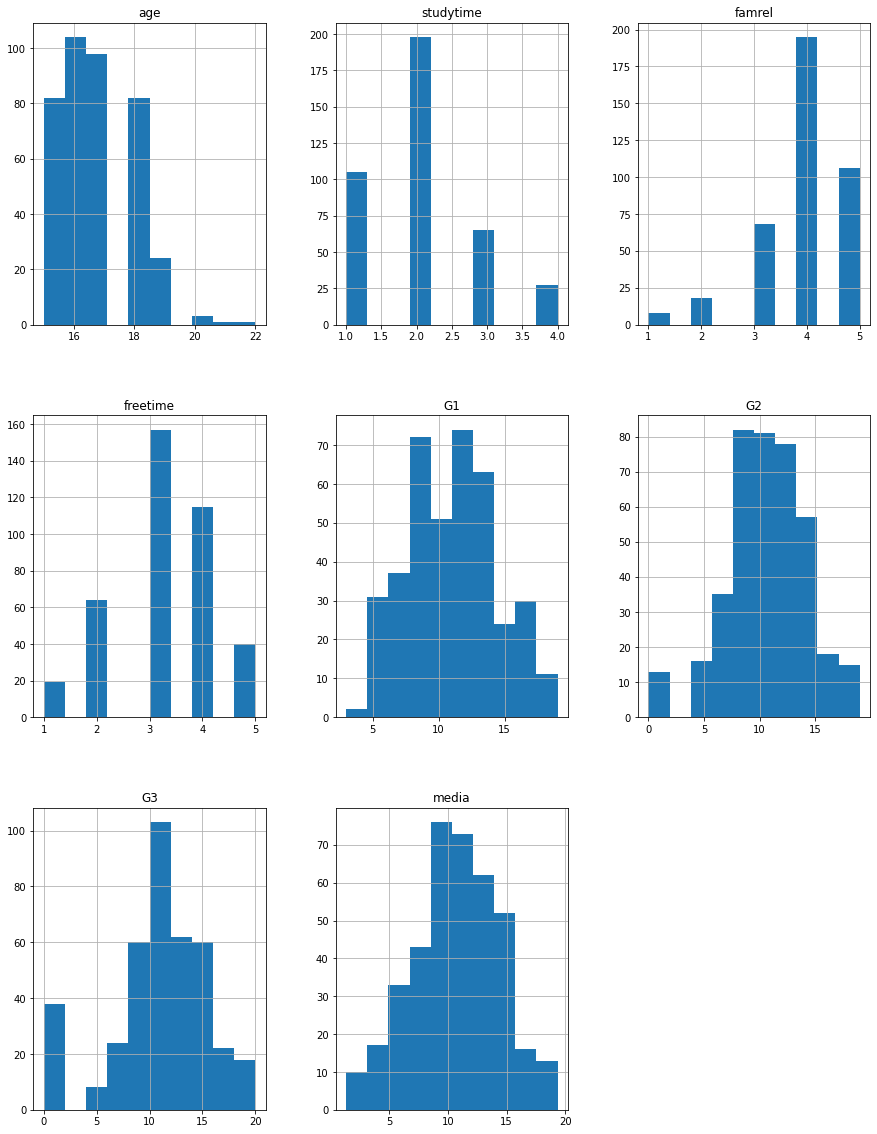

In [16]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
mat_stud.hist(ax = ax)
plt.show()

#### Seleção de Atributos

Para a análise, serão avaliados como os hábitos dos estudantes de consumo elevado e muito elevado de álcool diariamente influenciam a média de suas notas e se esses consumos são influenciados por outros fatores.

A princípio, um novo dataset com esses estudantes será selecionado.

In [50]:
# Observando o consumo de álcool dos estudantes
mat_stud['Dalc'].value_counts()

Muito Baixo      276
Baixo             75
Médio             26
Elevado            9
Muito Elevado      9
Name: Dalc, dtype: int64

Text(0, 0.5, 'Estudantes')

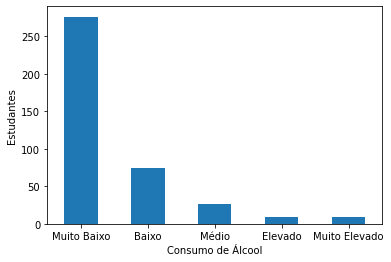

In [32]:
#Verificação visual do consumo de álcool por estudantes durante a semana

counts = mat_stud['Dalc'].value_counts()
counts.plot.bar(rot=0)
plt.xlabel("Consumo de Álcool")
plt.ylabel("Estudantes")

In [22]:
mat_stud['Walc'].value_counts()

Muito Baixo      151
Baixo             85
Médio             80
Elevado           51
Muito Elevado     28
Name: Walc, dtype: int64

Text(0, 0.5, 'Estudantes')

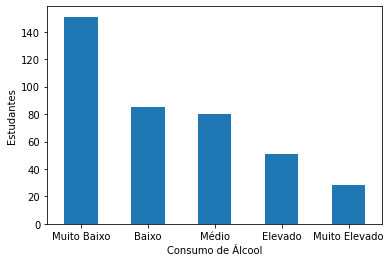

In [17]:
#Verificação visual do consumo de álcool por estudantes durante a semana

wcounts = mat_stud['Walc'].value_counts()
wcounts.plot.bar(rot=0)
plt.xlabel("Consumo de Álcool")
plt.ylabel("Estudantes")

In [35]:
# Seleção dos estudantes

mat_stud_s_notas = mat_stud.drop(['G1','G2','G3'],axis=1)
amostra_mat = mat_stud_s_notas.loc[(mat_stud['Dalc'] == 'Muito Elevado') | (mat_stud['Dalc'] == 'Elevado')]
amostra_s_mat = mat_stud_s_notas.loc[(mat_stud['Dalc'] == 'Médio') | (mat_stud['Dalc'] == 'Baixo') | (mat_stud['Dalc'] == 'Muito Baixo')]

In [36]:
amostra_mat.describe()

,age,studytime,famrel,freetime,media
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,17.277778,1.722222,3.944444,3.888889,10.221111
std,1.708303,0.751904,1.109967,0.900254,2.401281
min,15.000000,1.000000,1.000000,2.000000,5.330000
25%,16.000000,1.000000,4.000000,3.000000,9.000000
50%,17.000000,2.000000,4.000000,4.000000,10.665000
75%,18.000000,2.000000,5.000000,4.750000,12.330000
max,22.000000,4.000000,5.000000,5.000000,13.330000


In [38]:
amostra_s_mat.describe()

,age,studytime,famrel,freetime,media
count,377.000000,377.000000,377.000000,377.000000,377.000000
mean,16.668435,2.050398,3.944297,3.204244,10.701008
std,1.247928,0.841166,0.887008,0.993694,3.748361
min,15.000000,1.000000,1.000000,1.000000,1.330000
25%,16.000000,1.000000,4.000000,3.000000,8.330000
50%,17.000000,2.000000,4.000000,3.000000,10.670000
75%,18.000000,2.000000,5.000000,4.000000,13.330000
max,21.000000,4.000000,5.000000,5.000000,19.330000


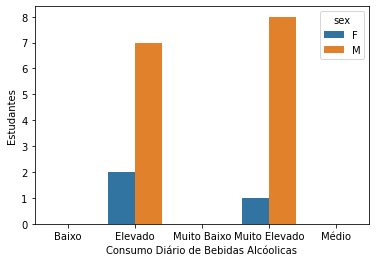

In [27]:
sns.countplot(amostra_mat['Dalc'],hue = amostra_mat['sex'])
plt.xlabel('Consumo Diário de Bebidas Alcóolicas')
plt.ylabel('Estudantes')
plt.show()

In [28]:
# Percentual de estudantes com consumos elevados

pct_mat = amostra_mat

<ipython-input-29-920cd3d2b3dc>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  amostra_mat.hist(ax = ax)


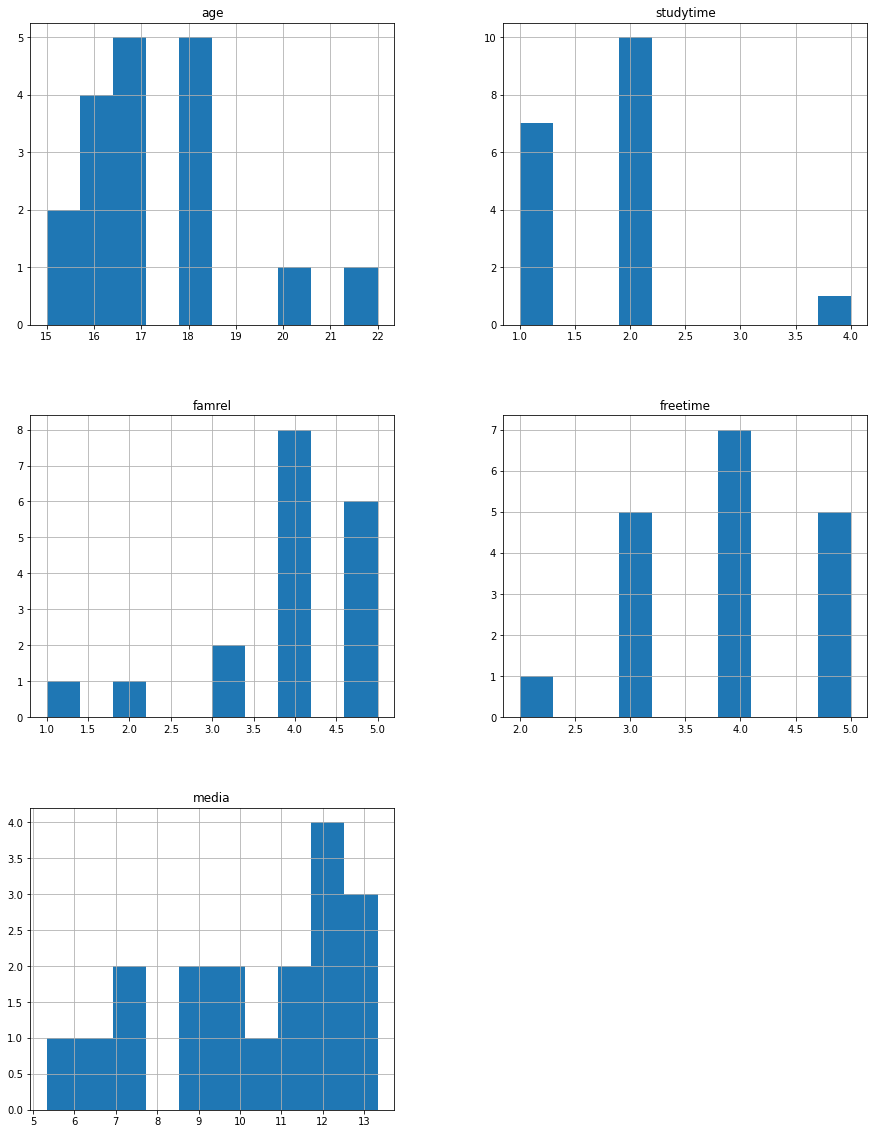

In [29]:
# Histograma dos dados para este conjunto
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
amostra_mat.hist(ax = ax)
plt.show()

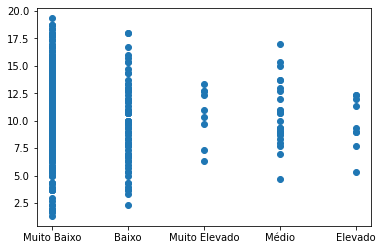

In [65]:
plt.scatter(mat_stud['Dalc'],mat_stud['media'])
plt.show()

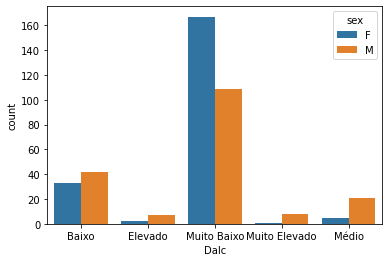

In [71]:
sns.countplot(mat_stud['Dalc'],hue = mat_stud['sex'])
plt.show()

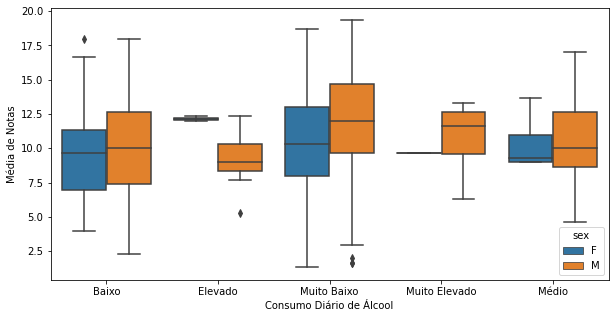

In [80]:
plt.figure(figsize=(10,5))
sns.boxplot(x=mat_stud['Dalc'], y=mat_stud['media'], hue=mat_stud['sex'])
plt.xlabel('Consumo Diário de Álcool')
plt.ylabel('Média de Notas')
plt.show()

In [24]:
mat_stud.describe()

,age,studytime,famrel,freetime,G1,G2,G3,media
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.035443,3.944304,3.235443,10.908861,10.713924,10.415190,10.679139
std,1.276043,0.839240,0.896659,0.998862,3.319195,3.761505,4.581443,3.696912
min,15.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,1.330000
25%,16.000000,1.000000,4.000000,3.000000,8.000000,9.000000,8.000000,8.330000
50%,17.000000,2.000000,4.000000,3.000000,11.000000,11.000000,11.000000,10.670000
75%,18.000000,2.000000,5.000000,4.000000,13.000000,13.000000,14.000000,13.330000
max,22.000000,4.000000,5.000000,5.000000,19.000000,19.000000,20.000000,19.330000


In [34]:
# dados de estudantes com consumo elevado de álcool
mat_stud[mat_stud['Walc'] == 'Elevado'].head()

,sex,age,Pstatus,studytime,failures,activities,higher,internet,famrel,freetime,Dalc,Walc,G1,G2,G3,media
18,M,17,T,1,3,True,True,True,5,5,Baixo,Elevado,6,5,5,5.33
23,M,16,T,2,0,True,True,True,5,4,Baixo,Elevado,13,13,12,12.67
27,M,15,T,1,0,False,True,True,2,2,Baixo,Elevado,15,16,15,15.33
30,M,15,T,2,0,False,True,True,5,4,Médio,Elevado,9,11,12,10.67
41,M,15,T,1,0,False,True,True,5,4,Baixo,Elevado,12,12,12,12.00


In [54]:
# Avaliando relação de consumo diária com tipo de união parental
mat_stud[mat_stud['Dalc'] == 'Muito Elevado']['Pstatus'].value_counts()

T    8
A    1
Name: Pstatus, dtype: int64

In [56]:
# média de idade dos estudantes que consomem álcool diariamente com valores elevados e muito elevados
melev = mat_stud[mat_stud['Dalc'] == 'Muito Elevado']['age'].mean()
elev = mat_stud[mat_stud['Dalc'] == 'Elevado']['age'].mean()

mediaConsD = round((melev + elev)/2,2)
mediaConsD

17.28

In [35]:
mat_stud[mat_stud['Dalc'] == 'Muito Elevado'].describe()

,age,studytime,famrel,freetime,G1,G2,G3,media
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,17.222222,1.666667,3.555556,4.111111,10.444444,10.777778,10.666667,10.628889
std,2.048034,1.000000,1.333333,0.781736,2.603417,2.538591,2.692582,2.475674
min,15.000000,1.000000,1.000000,3.000000,6.000000,7.000000,5.000000,6.330000
25%,16.000000,1.000000,3.000000,4.000000,10.000000,8.000000,10.000000,9.670000
50%,17.000000,1.000000,4.000000,4.000000,11.000000,12.000000,11.000000,11.000000
75%,18.000000,2.000000,4.000000,5.000000,12.000000,13.000000,13.000000,12.670000
max,22.000000,4.000000,5.000000,5.000000,14.000000,13.000000,13.000000,13.330000


In [40]:
mat_stud_s_notas = mat_stud.drop(['G1','G2','G3'],axis=1)
mat_stud_s_notas.corr()

,age,studytime,activities,higher,internet,famrel,freetime,media
age,1.000000,-0.004140,-0.103063,-0.209081,-0.112094,0.053940,0.016434,-0.134566
studytime,-0.004140,1.000000,0.089877,0.175081,0.059422,0.039731,-0.143198,0.134546
activities,-0.103063,0.089877,1.000000,0.096484,0.048663,0.040687,0.089728,0.040808
higher,-0.209081,0.175081,0.096484,1.000000,0.020374,0.024319,-0.061244,0.189434
internet,-0.112094,0.059422,0.048663,0.020374,1.000000,0.032768,0.051286,0.102565
famrel,0.053940,0.039731,0.040687,0.024319,0.032768,1.000000,0.150701,0.021631
freetime,0.016434,-0.143198,0.089728,-0.061244,0.051286,0.150701,1.000000,0.003773
media,-0.134566,0.134546,0.040808,0.189434,0.102565,0.021631,0.003773,1.000000


selecionar dados elevado e muito elevado

In [95]:
amostra = mat_stud.loc[(mat_stud['Dalc'] == 'Muito Elevado') | (mat_stud['Dalc'] == 'Elevado')]
amostra.describe()

,age,studytime,famrel,freetime,G1,G2,G3,media
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,17.277778,1.722222,3.944444,3.888889,10.111111,10.277778,10.277778,10.221111
std,1.708303,0.751904,1.109967,0.900254,2.446820,2.562296,2.607806,2.401281
min,15.000000,1.000000,1.000000,2.000000,6.000000,5.000000,5.000000,5.330000
25%,16.000000,1.000000,4.000000,3.000000,9.250000,8.000000,9.000000,9.000000
50%,17.000000,2.000000,4.000000,4.000000,10.000000,11.000000,11.000000,10.665000
75%,18.000000,2.000000,5.000000,4.750000,11.750000,12.750000,12.750000,12.330000
max,22.000000,4.000000,5.000000,5.000000,14.000000,13.000000,13.000000,13.330000


<ipython-input-102-860663163c6e>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  amostra.hist(ax = ax)


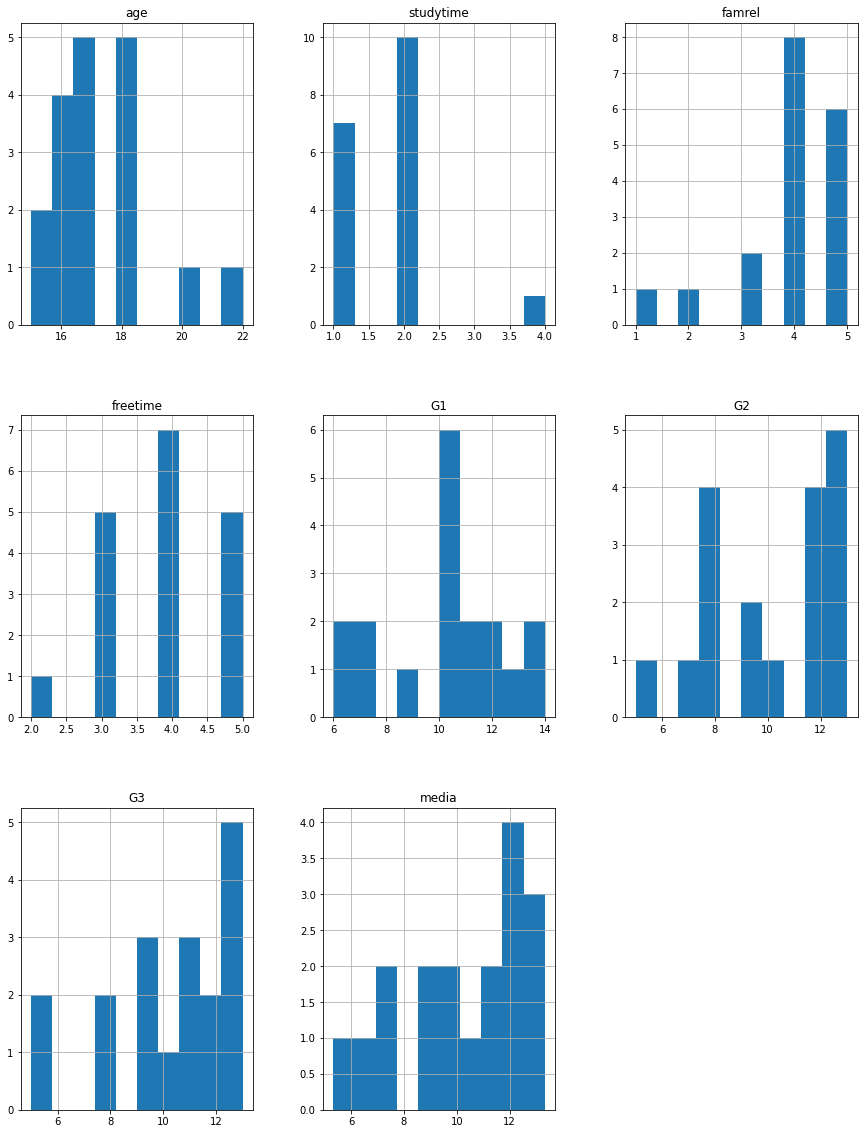

In [102]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
amostra.hist(ax = ax)
plt.show()